In [1]:
%matplotlib inline


# Comparison of LDA and PCA 2D projection of Iris dataset

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour
and Virginica) with 4 attributes: sepal length, sepal width, petal length
and petal width.

Principal Component Analysis (PCA) applied to this data identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that
account for the most variance *between classes*. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels.


In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()

In [4]:
iris_scaled = StandardScaler().fit_transform(iris.data)

In [5]:
## 150 samples, 4 features
iris.data.shape

(150, 4)

In [6]:
## iris types
iris.target.shape

(150,)

In [7]:
## iris types
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [48]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [49]:
temp = pca.components_
temp.shape

(2, 4)

In [50]:
import numpy as np

np.matmul(temp.T,temp)

array([[ 0.41395374,  0.20812027,  0.31167705,  0.31959257],
       [ 0.20812027,  0.92502292, -0.13371979, -0.09033542],
       [ 0.31167705, -0.13371979,  0.3374792 ,  0.32948965],
       [ 0.31959257, -0.09033542,  0.32948965,  0.32354414]])

In [53]:
np.matmul(X, temp.T) - X_r

array([[-2.22044605e-15, -2.44249065e-15],
       [-2.22044605e-15, -2.55351296e-15],
       [-2.22044605e-15, -2.49800181e-15],
       [-2.22044605e-15, -2.55351296e-15],
       [-2.22044605e-15, -2.66453526e-15],
       [-2.66453526e-15, -2.22044605e-15],
       [-2.22044605e-15, -2.55351296e-15],
       [-2.22044605e-15, -2.58126853e-15],
       [-2.66453526e-15, -2.22044605e-15],
       [-2.22044605e-15, -2.55351296e-15],
       [-2.22044605e-15, -2.22044605e-15],
       [-2.22044605e-15, -2.60902411e-15],
       [-2.22044605e-15, -2.66453526e-15],
       [-2.66453526e-15, -2.55351296e-15],
       [-2.66453526e-15, -2.44249065e-15],
       [-2.22044605e-15, -2.66453526e-15],
       [-2.66453526e-15, -2.44249065e-15],
       [-2.22044605e-15, -2.44249065e-15],
       [-1.99840144e-15, -2.44249065e-15],
       [-2.22044605e-15, -2.44249065e-15],
       [-1.99840144e-15, -2.44249065e-15],
       [-2.66453526e-15, -2.44249065e-15],
       [-2.66453526e-15, -2.55351296e-15],
       [-2.

In [10]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [11]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461872 0.05306648]


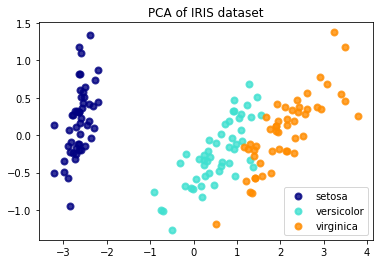

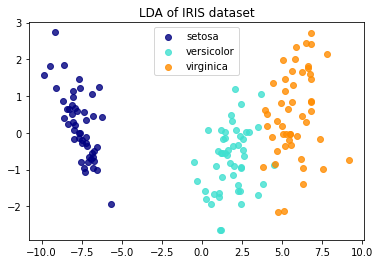

In [12]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()